In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import plot_importance

datas = pd.read_json('../yelp_dataset/yelp_dataset_labeled.json', lines=True).fillna(0)
datas

,business_id,city,label,latitude,longitude,review_count,stars,state,neighbor_count,4star_neighbor_count,active_users_in_city,neighbor_review_count
0,ZrkH2I-ct6rYX1FNBhY1oA,Nahant,1,42.436666,-70.936382,19,3.0,MA,0,0,19,0.0
1,UYWYdJjPjQDTRqhpfGvRLw,Osteen,0,28.843058,-81.164583,5,4.0,FL,0,0,5,0.0
2,odq3dSNenceAyzoyNogosA,South Natick,1,42.263404,-71.309128,12,2.5,MA,0,0,12,0.0
3,uiBZ6yYQ0wv6nwdhkrf4nA,West Vancouver,0,49.334655,-123.180291,2,2.5,BC,13,9,145,62.0
4,vwKdjOBaGprrN3Qyn4u8sw,West Vancouver,0,49.373914,-123.274435,4,3.5,BC,8,3,145,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26332,WpBwwZ2qVQmveXd_0CZuJg,Hilliard,0,40.017815,-83.136995,16,4.5,OH,23,9,344,205.0
26333,yHixklhb5guNmcvWkg8qZw,Hilliard,1,40.030409,-83.156736,8,4.0,OH,32,18,344,296.0
26334,GiIWtDUqYHIheAKT0zKs4g,Hilliard,1,40.017995,-83.136033,15,4.0,OH,23,8,344,198.0
26335,i4YPpmtUfkQSCNu1T7aZYA,Berkshire,0,40.267734,-82.924768,2,2.5,OH,0,0,2,0.0


In [2]:
y = datas['label']
city = datas['city']
state = datas['state']
city_dummies = pd.get_dummies(city, drop_first=True)
state_dummies = pd.get_dummies(state, drop_first=True)
x = pd.concat(objs=[datas.drop(columns=['business_id', 'label', 'city', 'state']), city_dummies, state_dummies], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
X_train

,latitude,longitude,review_count,stars,neighbor_count,4star_neighbor_count,active_users_in_city,neighbor_review_count,AUSTIN,Alamonte Springs,...,CO,DE,FL,GA,KS,MA,OH,OR,TX,WA
25442,42.349192,-71.079615,19,4.5,752,337,11663,22097.0,0,0,...,0,0,0,0,0,1,0,0,0,0
20203,28.302950,-81.456526,3,4.0,13,4,2570,137.0,0,0,...,0,0,1,0,0,0,0,0,0,0
14420,42.521312,-70.896277,49,4.0,96,61,909,1473.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2738,45.583626,-122.687600,9,4.5,37,16,14224,458.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3886,45.456941,-122.579273,4,2.0,35,20,14224,356.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6561,39.997720,-83.008575,6,3.5,140,70,3487,1967.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1617,28.696546,-81.362172,3,4.5,34,25,438,390.0,0,0,...,0,0,1,0,0,0,0,0,0,0
21748,28.430699,-81.470316,58,4.0,112,49,13249,3922.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3468,45.534914,-122.658897,8,2.5,430,300,14224,13019.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
from sklearn import metrics
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[20:32:06] WARNING: ..\src\learner.cc:541: 
Parameters: { slient } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:32:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuarcy:66.72%
Confusion matrix, without normalization


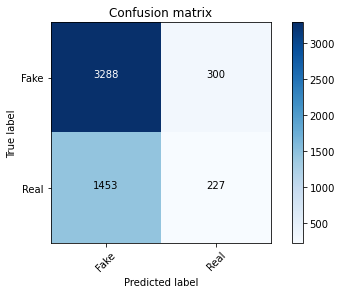

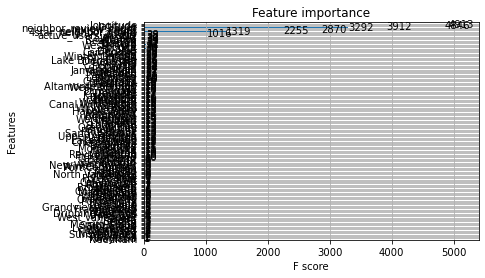

In [4]:
# 算法参数
params = {
    'booster':'gbtree',
    'objective':'multi:softmax',
    'num_class':3,
    'gamma':0.1,
    'max_depth':6,
    'lambda':2,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'slient':1,
    'eta':0.1,
    'seed':1000,
    'nthread':4,
}

plst = list(params.items())

# 生成数据集格式
dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 500
# xgboost模型训练
model = xgb.train(plst,dtrain,num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print('accuarcy:%.2f%%'%(accuracy*100))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
# 显示重要特征
plot_importance(model)